# The wave equation

We consider the PDE

$$
u_{tt} - c^2 u_{xx} = 0, \quad c\in\mathbb{R}
$$

The solutions have the form $u(t,x) = f(x+ct) + g(x-ct)$ for somewhat arbitrary functions $f, g$.

In [33]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import animation
plt.rc('animation', html='jshtml')

from sympy import *
init_printing()

In [34]:
x, t = symbols('x t')
c = symbols('c')

In [81]:
u = Function('u')
f = Function('f')(x + c*t)
g = Function('g')(x - c*t)

phi,psi= Function('phi'), Function('psi')

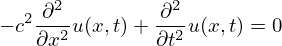

In [74]:
wave_eq = u(x,t).diff(t,t) - c**2 * u(x,t).diff(x,x)
Eq(wave_eq,0)

In [37]:
generic_sol = f + g
generic_sol

Let's check that that `generic_sol` is actually a solution of the wave equation

In [75]:
checkpdesol(wave_eq, generic_sol)[0]

True

As we saw in class the two parts of the solutions are traveling independently of each other.

In [62]:
# Thanks to
# https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial
def animate_fg(f, g, xlim, ylim, tspan):
    fig, ax = plt.subplots()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    line, = plt.plot([], [], lw=2)
    
    t0, t1 = tspan
    t = np.linspace(t0, t1, 50)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        xl, xr = xlim
        x = np.linspace(xl, xr, 1000)
        u = f(x+t[i]) + g(x-t[i])
        line.set_data(x, u)
        return line,

    # call the animator
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(t), interval=50,
                                   blit=True)

    return anim

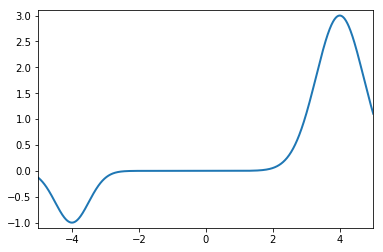

In [63]:
animate_fg(
    f=lambda x: -np.exp(-2*x**2),
    g=lambda x: 3*np.exp(-x**2),
    xlim=(-5, 5), ylim=(-1.1, 3.1),
    tspan=(-4,4)
)

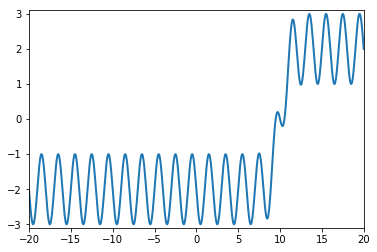

In [65]:
animate_fg(
    f=lambda x: -np.sin(np.pi*x),
    g=lambda x: 2*np.tanh(np.pi*x/3),
    xlim=(-20, 20), ylim=(-3.1, 3.1),
    tspan=(-10,10)
)

# Initial value problem

Given $\phi(x)$ and $\psi(x)$, we saw that for the initial conditions
$$
u(x,0) = \phi(x), \quad u_t(x,0) = \psi(x)
$$
we find a solution of the form
$$
u(x,t) = \frac12 \left(\phi(x+ct) + \phi(x-ct)\right) + \frac1{2c}\int_{-\infty}^{\infty} \psi(x) dx
$$

In [109]:
v = 1/2*(phi(x+c*t)+phi(x-c*t))+1/(2*c)*integrate(psi(x),(x,x-c*t,x+c*t))

In [129]:
def animate_u(u, xlim, ylim, tspan):
    fig, ax = plt.subplots()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    line, = plt.plot([], [], lw=2)
    
    t0, t1 = tspan
    t = np.linspace(t0, t1, 50)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        xl, xr = xlim
        x = np.linspace(xl, xr, 1000)
        line.set_data(x, u(x,t[i]))
        return line,

    # call the animator
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(t), interval=50,
                                   blit=True)

    return anim

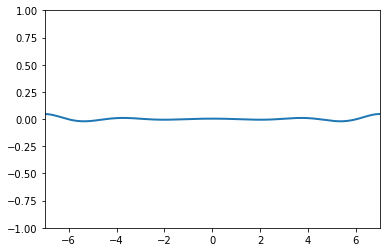

In [136]:
animate_u(
    lambdify([x,t], v.subs(c,1).
             replace(phi,lambda a: cos(2*a)/(a**2+1)).
             replace(psi(x),0).
             doit()),
    xlim=(-7,7),
    ylim=(-1,1),
    tspan=(-3,10)
)

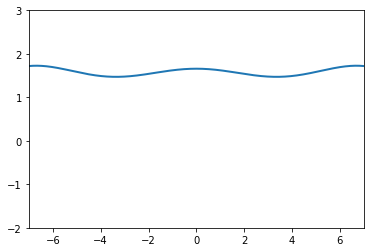

In [155]:
animate_u(
    # Sometimes we need to force things a bit by hand...
    np.vectorize(
        lambdify([x,t], v.subs(c,1).
             replace(phi,lambda a: exp(-2*a**2)/3).
             replace(psi,lambda x: sin(x)/x).
             doit(),
            modules=['numpy',{'Si':Si}]
                )
    ),
    xlim=(-7,7),
    ylim=(-2,3),
    tspan=(-3,10)
)

# This is slooow to compute...

In [156]:
# Have fun!